In [ ]:
# Introducción
#### 0.1.1 - 2025 - 09 - 01
#### Dr. Marco Aceves
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 7_distribucion

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Para que los gráficos se vean bien
plt.style.use('ggplot')

# --- Simulando el conjunto de datos de "Housing Prices" ---
# Creamos un DataFrame (similar a una hoja de cálculo) con datos de ejemplo
datos_casas = {
    'PrecioVenta': np.random.lognormal(mean=12, sigma=0.4, size=1000), # Distribución sesgada a la derecha
    'AreaHabitable': np.random.normal(loc=1500, scale=400, size=1000) # Distribución normal
}
df_casas = pd.DataFrame(datos_casas)

# Añadimos unos pocos valores atípicos (outliers) para el ejemplo
df_casas.loc[df_casas.index[990:995], 'PrecioVenta'] *= 3

# --- Simulando el conjunto de datos del "Titanic" ---
datos_titanic = {
    'Edad': np.concatenate([np.random.normal(30, 10, 500), np.random.normal(5, 2, 50)]), # Datos con dos picos
    'Clase': np.random.choice(['1st', '2nd', '3rd'], size=550, p=[0.2, 0.3, 0.5]),
    'Sobrevivio': np.random.choice([0, 1], size=550, p=[0.6, 0.4])
}
df_titanic = pd.DataFrame(datos_titanic)

# --- Simulando datos para el gráfico de radar ---
# Creamos un DataFrame para comparar jugadores de baloncesto
datos_jugadores = {
    'Jugador': ['A', 'B', 'C'],
    'Puntos': [25, 15, 10],
    'Asistencias': [8, 12, 3],
    'Rebotes': [5, 6, 15],
    'Robos': [2, 1, 1],
    'Bloqueos': [1, 1, 3]
}
df_jugadores = pd.DataFrame(datos_jugadores)

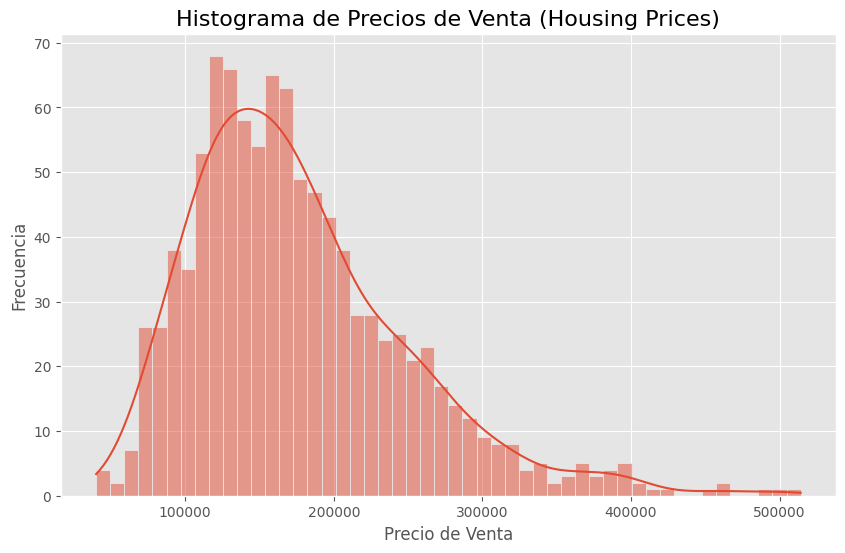

In [2]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Usamos la función histplot de Seaborn para crear el histograma
# `bins` define el número de "contenedores" para agrupar los datos
sns.histplot(df_casas['PrecioVenta'], kde=True, bins=50)

# Añadimos títulos y etiquetas para que el gráfico sea claro
plt.title('Histograma de Precios de Venta (Housing Prices)', fontsize=16)
plt.xlabel('Precio de Venta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Muestra el gráfico
plt.show()

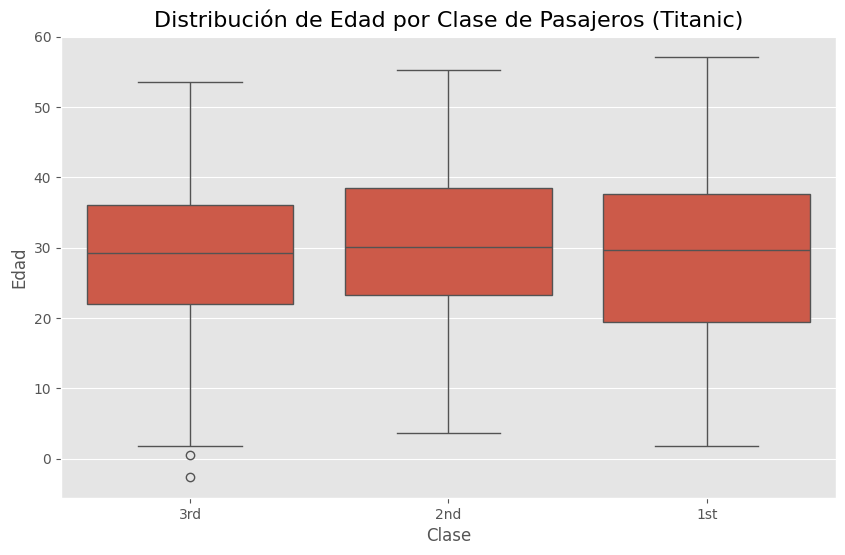

In [3]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Usamos la función boxplot de Seaborn
# El eje X es la variable categórica ('Clase') y el eje Y es la numérica ('Edad')
sns.boxplot(x='Clase', y='Edad', data=df_titanic)

plt.title('Distribución de Edad por Clase de Pasajeros (Titanic)', fontsize=16)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.show()

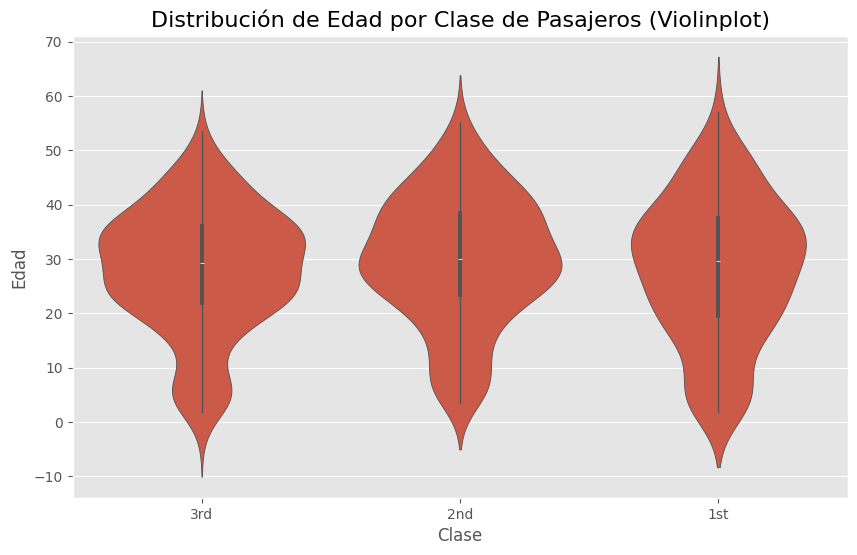

In [4]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Usamos la función violinplot de Seaborn
sns.violinplot(x='Clase', y='Edad', data=df_titanic)

plt.title('Distribución de Edad por Clase de Pasajeros (Violinplot)', fontsize=16)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.show()

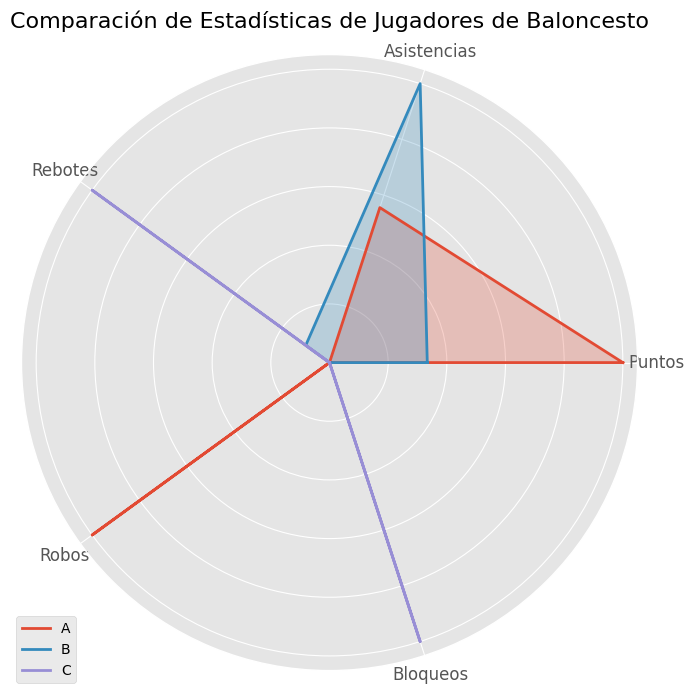

In [5]:
# Definimos las variables a comparar
variables = ['Puntos', 'Asistencias', 'Rebotes', 'Robos', 'Bloqueos']
num_vars = len(variables)

# Calcular el ángulo para cada variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Cierra el círculo

# Para cada jugador, creamos un subgráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Normalizamos los datos para que todos estén en la misma escala (de 0 a 1)
df_jugadores_norm = df_jugadores.copy()
for var in variables:
    df_jugadores_norm[var] = (df_jugadores_norm[var] - df_jugadores_norm[var].min()) / \
                             (df_jugadores_norm[var].max() - df_jugadores_norm[var].min())

# Iteramos sobre cada jugador y graficamos sus datos
for i, jugador in df_jugadores_norm.iterrows():
    valores = jugador[variables].tolist()
    valores += valores[:1]
    ax.plot(angles, valores, linewidth=2, linestyle='solid', label=df_jugadores.loc[i, 'Jugador'])
    ax.fill(angles, valores, alpha=0.25)

# Configuración del gráfico de radar
ax.set_yticklabels([]) # Ocultamos las etiquetas del eje Y
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=12)

# Añadimos la leyenda y el título
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Comparación de Estadísticas de Jugadores de Baloncesto', fontsize=16, pad=20)
plt.show()